# Variable Charging Curve (L3) - EV

In [2]:
import os
os.chdir(path=os.path.dirname(os.path.dirname(os.path.abspath(os.curdir))))

In [3]:
from datetime import datetime, timedelta
import pandas as pd
from pytz import UTC
from watttime_optimizer import WattTimeOptimizer
from watttime_optimizer.battery import Battery, CARS_L3
from watttime_optimizer.evaluator.analysis import plot_predicated_moer, plot_charging_units, plot_scheduled_moer

In [13]:
username = os.getenv("WATTTIME_USER")
password = os.getenv("WATTTIME_PASSWORD")
wt_opt = WattTimeOptimizer(username, password)

# 12 hour charge window (720/60 = 12)
now = datetime.now(UTC)
window_start = now
window_end = now + timedelta(minutes=720)

battery = Battery(
    initial_soc=.5,
    charging_curve=pd.DataFrame(
        columns=["SoC", "kW"],
        data=CARS_L3['audi']
    ),
    capacity_kWh=71,
)

variable_usage_power = battery.get_usage_power_kw_df()

usage_plan = wt_opt.get_optimal_usage_plan(
    region="CAISO_NORTH",
    usage_window_start=window_start,
    usage_window_end=window_end,
    usage_time_required_minutes=240,
    usage_power_kw=variable_usage_power,
    optimization_method="auto",
)

== Sophisticated fit! ==


In [14]:
print(usage_plan.sum())

pred_moer           91710.600000
usage                 240.000000
emissions_co2_lb       64.521660
energy_usage_mwh        0.240331
dtype: float64


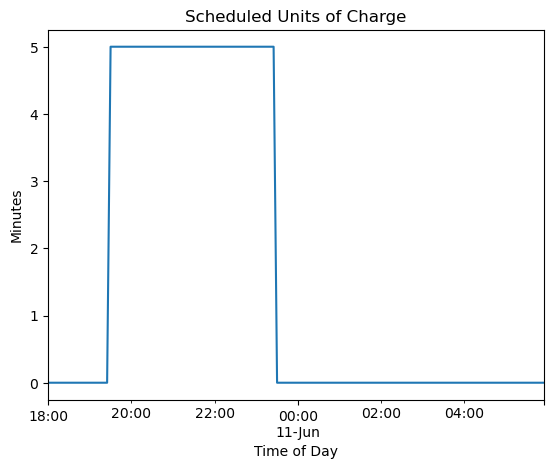

In [15]:
plot_charging_units(usage_plan)

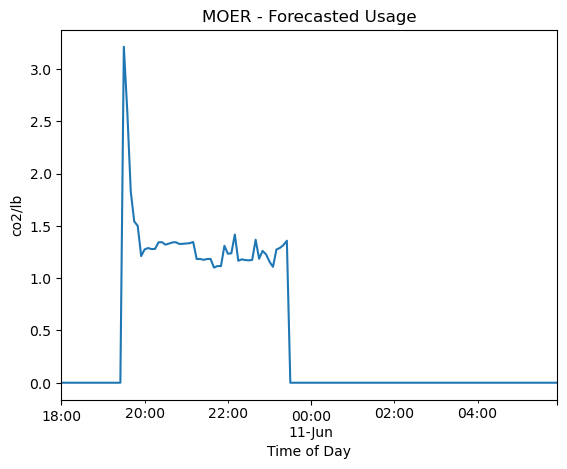

In [16]:
plot_scheduled_moer(usage_plan)

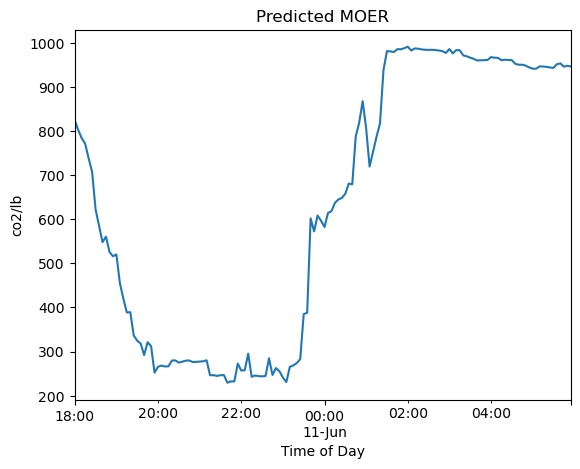

In [12]:
plot_predicated_moer(usage_plan)